### code to calculate BR ratio filter for noise level.
#### author: Claudia Acquistapace
#### date: 22 Nov 2021
#### goal: read BR data and find cloud base, and develop a filter containing:
- flag: cloud == 1, no cloud ==0 <br>
- cloud base height: if flag == 1, cbh = cb, if flag == 0, cbh==np.nan <br>
The filter is saved in ncdf and is created to filter the data and set to np.nan everything above cloud base height. 


In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib.dates as mdates
import glob
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
def f_closest(array,value):
    '''
    # closest function
    #---------------------------------------------------------------------------------
    # date :  16.10.2017
    # author: Claudia Acquistapace
    # goal: return the index of the element of the input array that in closest to the value provided to the function
    '''
    import numpy as np
    idx = (np.abs(array-value)).argmin()
    return idx  



In [2]:
# output paths
path_out = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/SST_impact_work/plots/'

# plots settings to be used
labelsizeaxes   = 14
fontSizeTitle   = 16
fontSizeX       = 16
fontSizeY       = 16
cbarAspect      = 10
fontSizeCbar    = 16
rcParams['font.sans-serif'] = ['Tahoma']
matplotlib.rcParams['savefig.dpi'] = 100
plt.rcParams.update({'font.size':22})
grid = True

# read BR files
data_path = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/'

arthus_files = np.sort(glob.glob(data_path+'*.cdf'))
print(arthus_files)


# merging data from each day in a single xarray dataset
BR_data = xr.open_mfdataset(arthus_files)



# calculation of the gradient of each profile
grad_profiles = np.gradient(BR_data['Product'].values, BR_data['Height'].values, axis=1)

# calculation of the position of the maxima
ind_max_gradient = np.nanargmax(grad_profiles, axis=1)

# calculation of the height max array
max_grad_height = BR_data['Height'].values[ind_max_gradient]

# calculation of cloud base height as 100 m below grad maxima (see discussion with Diego/Florian on zoom)
cb_height = max_grad_height-100.

['/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200128_000005_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200129_000009_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200130_000003_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200131_000006_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200201_120710_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200202_000008_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200203_000005_BRme_10s_97m_max_alt_scale.cdf'
 '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/BR/20200204_000000_BRme_10s_97m_max_alt_scale.cdf']

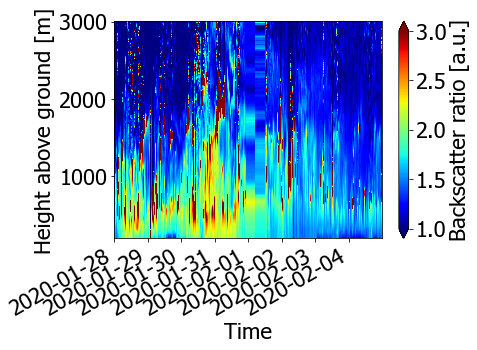

In [3]:
BR_data.Product.plot(x='Time', y='Height', cmap="jet", vmin=1., vmax=3.)

<ipython-input-4-5183ddddcdc4>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = axs.pcolormesh(pd.to_datetime(BR_data['Time'].values), BR_data['Height'].values, \


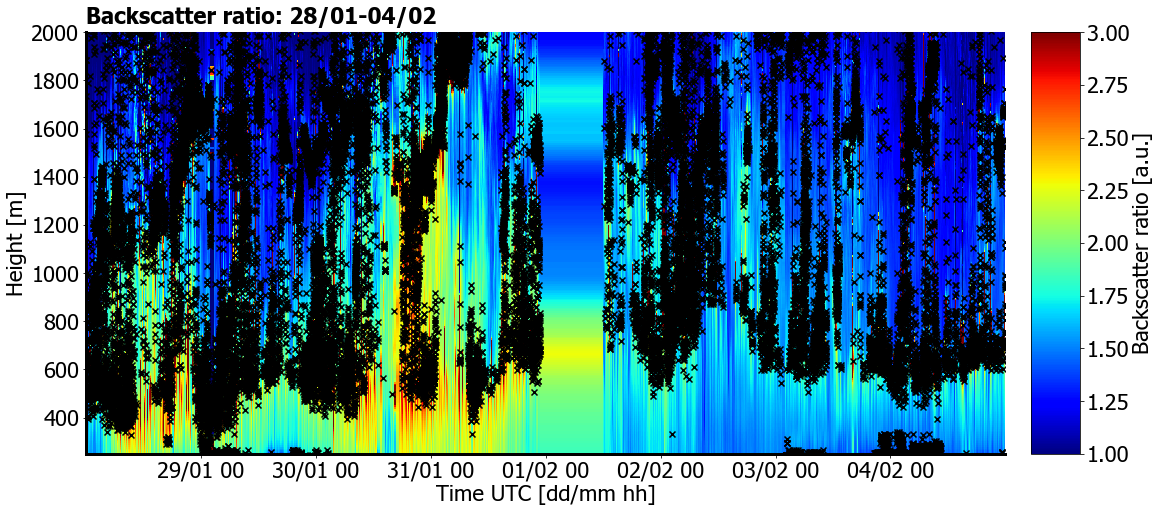

In [4]:
BR_dict = {
     'var_name'  : 'Backscatter ratio [a.u.]',
     'var_string': 'Backscatter ratio ',
     'var_units' : '[a.u.]',
     'var_min'   : 1.,
     'var_max'   : 3.,
     'cmap'      : 'jet',
     'title'     : 'Backscatter ratio: 28/01-04/02'}


# plot BR ratio and max height gradient for checking
fig, axs = plt.subplots(1, 1, figsize=(16,7), constrained_layout=True)
axs.get_yaxis().tick_left()
axs.get_xaxis().tick_bottom() 
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["bottom"].set_linewidth(3)
axs.spines["left"].set_linewidth(3)

mesh = axs.pcolormesh(pd.to_datetime(BR_data['Time'].values), BR_data['Height'].values, \
                         BR_data['Product'].values.T, vmin=BR_dict['var_min'], \
                         vmax=BR_dict['var_max'], cmap=BR_dict['cmap'], rasterized=True)

cbar = fig.colorbar(mesh, ax=axs, label=BR_dict['var_string']+BR_dict['var_units'], \
                    location='right', aspect=20, use_gridspec=grid)
axs.scatter(BR_data['Time'].values, max_grad_height, marker="x", \
color='black', label='height max gradient')
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H'))
axs.set_ylim(250., 2000.)
axs.set_xlabel('Time UTC [dd/mm hh]')
axs.set_ylabel('Height [m]')
axs.text(0, 1.02, BR_dict['title'],  fontweight='black', transform=axs.transAxes)
fig.savefig(path_out+'{var_name}_time_serie.png'.format(**BR_dict))



In [5]:
# reading cloud radar data
w_band_file = '/Volumes/Extreme SSD/ship_motion_correction_merian/corrected_data/wband_daily_with_DOI/latest/with_DOI/daily_intake/20200130_wband_radar_msm_eurec4a_intake.nc'
w_band_radar_data = xr.open_dataset(w_band_file)
Ze = w_band_radar_data['radar_reflectivity'].values
w_time = pd.to_datetime(w_band_radar_data['time'].values)
w_height = w_band_radar_data['height'].values


# reading arthus T data
arthus_files = np.sort(glob.glob('/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/T/*.cdf'))
# merging data from each day in a single xarray dataset
T_data = xr.open_mfdataset(arthus_files)
T_dict = {
     'var_name'  : 'T',
     'var_string': 'Temperature',
     'var_units' : ' $^{\circ}$K',
     'var_min'   : 290.,
     'var_max'   : 310.,
     'avg_time'  : '15',
     'cmap'      : 'jet',
     'title'     : 'Air temperature: 28/01-04/02'}


61657
61657


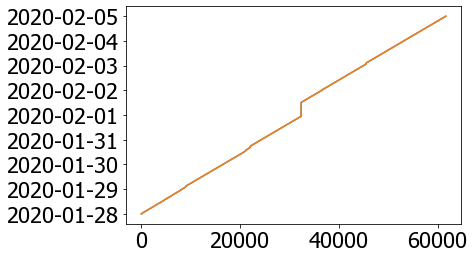

In [6]:
# interpolation of Time T  over time BR, that has less elements, and mantains the gap
T_data = T_data.interp(Time=BR_data['Time'].values)
#V_windS_hour = V_windS_hour.interp(time=timeInterp) 
print(len(T_data.Time.values))
print(len(BR_data['Time'].values))
plt.plot(BR_data['Time'].values)#,arthus_data['Time'].values )
plt.plot(T_data.Time.values)

<ipython-input-9-4f6623753fdd>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = axs[0].pcolormesh(pd.to_datetime(BR_data['Time'].values), BR_data['Height'].values, \
<ipython-input-9-4f6623753fdd>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = axs[1].pcolormesh(pd.to_datetime(w_time), w_height, \
<ipython-input-9-4f6623753fdd>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.

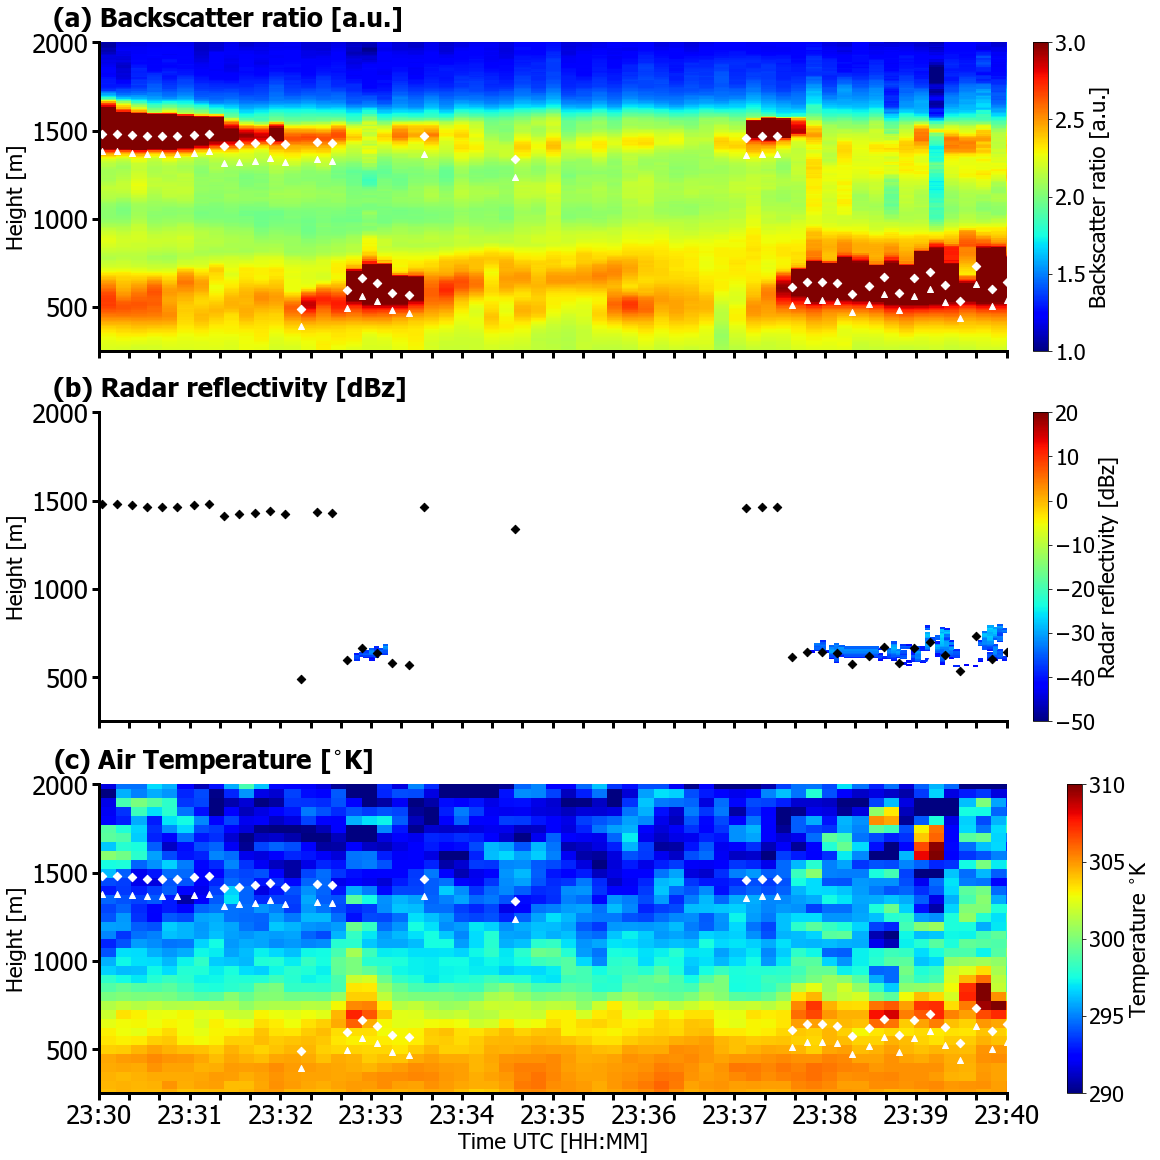

In [9]:
# zoom on 10 min to check efficiency of the method by comparing with cloud radar reflectivity and arthus temperature
grid = True



fig, axs = plt.subplots(3, 1, figsize=(16,16), sharex=True, constrained_layout=True)

# first panel: BR ratio and gradient max
mesh = axs[0].pcolormesh(pd.to_datetime(BR_data['Time'].values), BR_data['Height'].values, \
                         BR_data['Product'].values.T, vmin=BR_dict['var_min'], \
                         vmax=BR_dict['var_max'], cmap=BR_dict['cmap'], rasterized=True)
cbar = fig.colorbar(mesh, ax=axs[0], label=BR_dict['var_string']+BR_dict['var_units'], \
                    location='right', aspect=20, use_gridspec=grid)
axs[0].scatter(BR_data['Time'].values, max_grad_height, marker="D", \
color='white', label='height BR max gradient')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H'))
axs[0].scatter(BR_data['Time'].values, cb_height, marker="^", color='white', label='CBH')



# second panel: radar reflectivity and BR gradient max
mesh = axs[1].pcolormesh(pd.to_datetime(w_time), w_height, \
                         Ze.T, vmin=-50., \
                         vmax=20., cmap='jet', rasterized=True)
cbar = fig.colorbar(mesh, ax=axs[1], label='Radar reflectivity [dBz]', location='right', aspect=20, use_gridspec=True)
axs[1].scatter(BR_data['Time'].values, max_grad_height, marker="D", \
color='black', label='height BR max gradient')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H'))
axs[1].scatter(BR_data['Time'].values, cb_height, marker="^", color='white', label='CBH')
  
    

# third panel: T arthus and gradient max
mesh = axs[2].pcolormesh(pd.to_datetime(T_data['Time'].values), T_data['Height'].values, \
                         T_data['Product'].values.T, vmin=T_dict['var_min'], \
                         vmax=T_dict['var_max'], cmap=T_dict['cmap'], rasterized=True)
cbar = fig.colorbar(mesh, ax=axs[2], label=T_dict['var_string']+T_dict['var_units'], \
                    location='right', aspect=20, use_gridspec=grid)
axs[2].scatter(BR_data['Time'].values, max_grad_height, marker="D", color='white', label='height BR max gradient')
axs[2].scatter(BR_data['Time'].values, cb_height, marker="^", color='white', label='CBH')


axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H'))
axs[2].set_xlabel('Time UTC [HH:MM]')
                           
             

for ax, l in zip(axs[:].flatten(), ['(a) Backscatter ratio [a.u.]',  '(b) Radar reflectivity [dBz]',\
                                      '(c) Air Temperature [$^{\circ}$K]']):
    ax.text(-0.05, 1.05, l,  fontweight='black', fontsize=26, transform=ax.transAxes)
    ax.set_xlim(datetime(2020,1,30,23,30,0), datetime(2020,1,30,23,40,0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(3)
    ax.spines["left"].set_linewidth(3)
    ax.get_yaxis().tick_left()
    ax.get_xaxis().tick_bottom() 
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=3))
    ax.tick_params(which='minor', length=7, width=3)
    ax.tick_params(which='major', length=7, width=3)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax.tick_params(axis='both', labelsize=26)
    ax.set_ylabel('Height [m]')
    ax.set_ylim(250., 2000.)
    
    
fig.savefig(path_out+'composite_time_serie_zoom.png')



In [11]:
# find index of time corresponding to 23:30 of the 2020-01-30
ind_time_start = f_closest(pd.to_datetime(BR_data['Time'].values), datetime(2020,1,30,23,30,0))
ind_time_start
ind_time_end = f_closest(pd.to_datetime(BR_data['Time'].values), datetime(2020,1,30,23,40,0))
ind_time_end

delta_ind = ind_time_end - ind_time_start
delta_ind

59

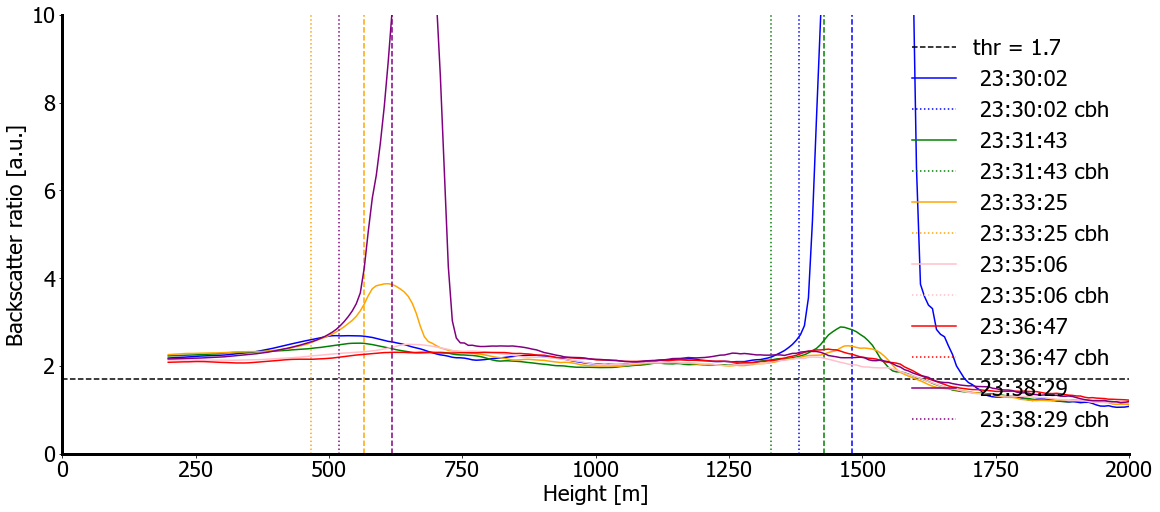

In [12]:

# plot profiles to identify a threshold empirically
fig, axs = plt.subplots(1, 1, figsize=(16,7), constrained_layout=True)
axs.get_yaxis().tick_left()
axs.get_xaxis().tick_bottom() 
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["bottom"].set_linewidth(3)
axs.spines["left"].set_linewidth(3)
axs.set_xlim(0., 2000.)
axs.set_ylim(0.,10.)
axs.set_xlabel('Height [m]')
axs.set_ylabel('Backscatter ratio [a.u.]')
axs.axhline(y=1.7, color='black', linestyle='--', label='thr = 1.7')
color_arr = ['blue', 'green', 'orange', 'pink', 'red','purple']
count = 0
for ind in range(24069, 24128, 10):
    axs.plot(BR_data['Height'].values, BR_data['Product'].values[ind,:], label=str(pd.to_datetime(BR_data['Time'].values[ind]))[10:19], color=color_arr[count])
    axs.axvline(max_grad_height[ind], linestyle='--', color=color_arr[count])
    axs.axvline(cb_height[ind], linestyle='dotted', color=color_arr[count], label=str(pd.to_datetime(BR_data['Time'].values[ind]))[10:19]+' cbh')

    count = count+1
axs.legend(frameon=False, loc='right')

fig.savefig(path_out+'BR_profiles_zoom.png')

In [ ]:
# creation of the mask to filter arthus data
# save xarray dataset containing the correction terms for the hour
dims             = ['Time','Height']
coords           = {"Time":pd.to_datetime(BR_data['Time'].values), "Height":BR_data['Height'].values}
dimt = ['Time']
coord_t = {"Time":pd.to_datetime(BR_data['Time'].values)}

mask = np.ones((len(pd.to_datetime(BR_data['Time'].values)),len(BR_data['Height'].values)))
for ind in range(len(pd.to_datetime(BR_data['Time'].values))):
    ind_zero = np.where(BR_data['Height'].values > max_grad_height[ind])[0]
    mask[ind,ind_zero] = 0
    
mask_noise                = xr.DataArray(dims=dims, coords=coords, data=mask,
                         attrs={'long_name':'noise mask to set to np.nan everything above cloud base height',
                                'units':'', 
                                'comment':'mask==1 good, mask==0 signal to remove'})
cbh =  xr.DataArray(dims=dimt, coords=coord_t, data=cb_height,
                         attrs={'long_name':'cloud base height',
                                'units':'m'})
variables         = {'noise_mask':mask_noise,
                     'cloud_base_height':cbh}
global_attributes = {'CREATED_BY'       : 'Claudia Acquistapace',
                    'CREATED_ON'       :  str(datetime.now()),
                    'FILL_VALUE'       :  'NaN', 
                    'PI_NAME'          : 'Claudia Acquistapace',
                    'PI_AFFILIATION'   : 'University of Cologne (UNI), Germany', 
                    'PI_ADDRESS'       : 'Institute for geophysics and meteorology, Pohligstrasse 3, 50969 Koeln', 
                    'PI_MAIL'          : 'cacquist@meteo.uni-koeln.de',
                    'DO_NAME'          : 'University of Cologne - Germany',
                    'DO_AFFILIATION'   : 'University of Cologne - Germany',
                    'DO_address'       : 'Institute for geophysics and meteorology, Pohligstrasse 3, 50696 Koeln',
                    'DO_MAIL'          : 'cacquist@meteo.uni-koeln.de',
                    'DS_NAME'          : 'University of Cologne - Germany',
                    'DS_AFFILIATION'   : 'University of Cologne - Germany',
                    'DS_address'       : 'Institute for geophysics and meteorology, Pohligstrasse 3, 50696 Koeln',
                    'DS_MAIL'          : 'cacquist@meteo.uni-koeln.de',
                    'DATA_DESCRIPTION' : 'mask for signal above cloud base at arthus time resolution for data between 28.01 and 04.02',
                    'DATA_DISCIPLINE'  : 'Atmospheric Physics - Remote Sensing Radar Profiler',
                    'DATA_GROUP'       : 'Experimental;Profile;Moving',
                    'DATA_SOURCE'      : 'arthus data',
                    'DATA_PROCESSING'  : 'https://github.com/ClauClouds/SST-impact/',
                    'INSTRUMENT_MODEL' : 'arthus raman lidar system',
                     'COMMENT'         : 'data postprocessed by Diego Lange' }
dataset    = xr.Dataset(data_vars = variables,
                                  coords = coords,
                                   attrs = global_attributes)
dataset.to_netcdf('/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/arthus_data/noise_mask.nc')

